In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

In [3]:
train_id=train.PassengerId
test_id=test.PassengerId
train.drop("PassengerId",axis=1,inplace=True)
test.drop("PassengerId",axis=1,inplace=True)

In [4]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.Survived.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop("Survived",axis=1,inplace=True)

<ipython-input-4-6e132a382459>:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  all_data=pd.concat((train,test)).reset_index(drop=True)


In [5]:
all_data.isnull().sum()/len(all_data)*100

Age         20.091673
Cabin       77.463713
Embarked     0.152788
Fare         0.076394
Name         0.000000
Parch        0.000000
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Ticket       0.000000
dtype: float64

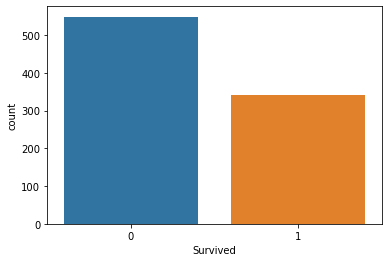

In [6]:
sns.countplot(train.Survived)

In [7]:
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
train.groupby(["Sex","Survived"])["Sex"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

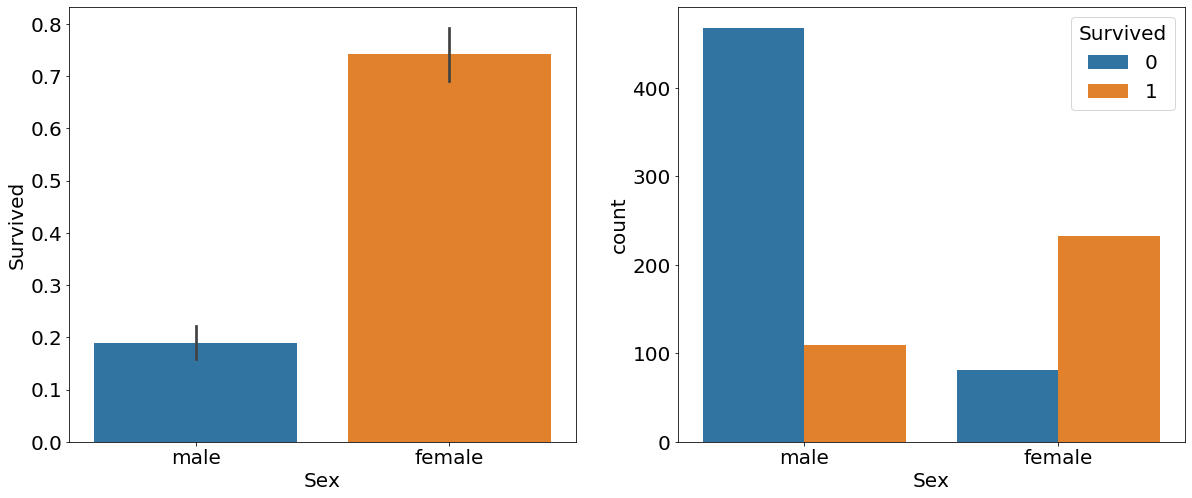

In [9]:
plt.rcParams.update({'font.size': 20})
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=train.Sex, y=train.Survived,ax=ax[0])
sns.countplot("Sex",data=train,hue="Survived",ax=ax[1])

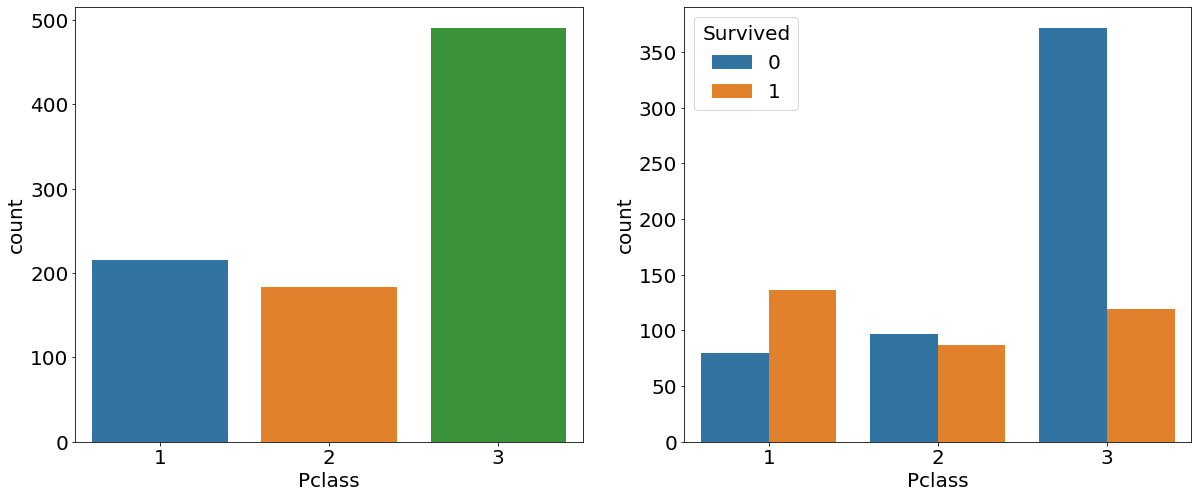

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot("Pclass",data=train,ax=ax[0])
sns.countplot("Pclass",hue="Survived",data=train,ax=ax[1])

c:\users\ipofr\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


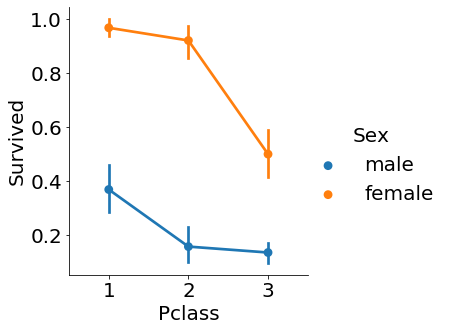

In [11]:
sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=train)

# Age

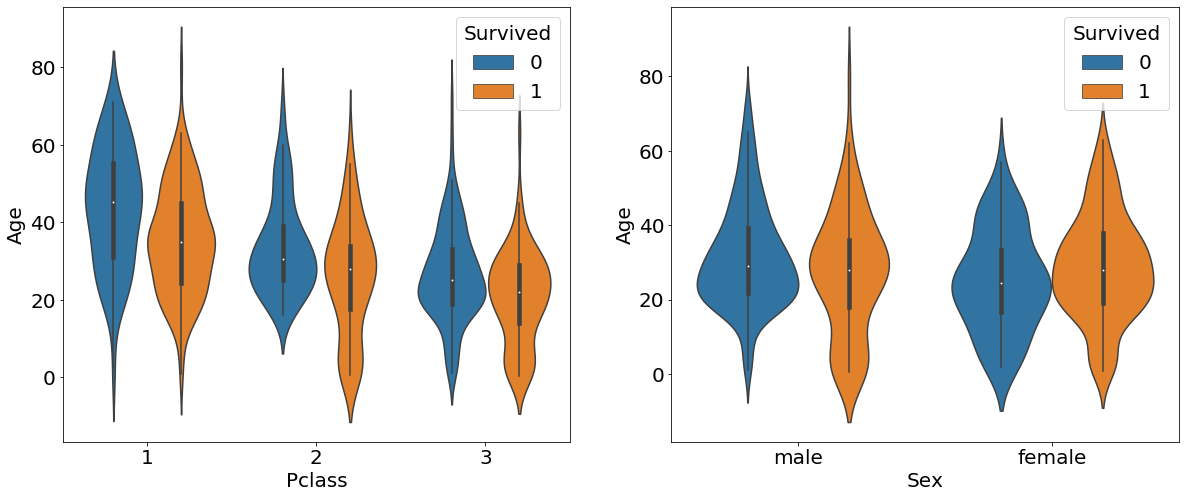

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=train,ax=ax[0])
sns.violinplot(x="Sex",y="Age",hue="Survived",data=train,ax=ax[1])

In [13]:
all_data["Initial"]=0
for i in all_data:
    all_data.Initial=all_data.Name.str.extract("([A-Za-z]+)\.")

In [14]:
train["Initial"]=0
for i in train:
    train.Initial=train.Name.str.extract("([A-Za-z]+)\.")

In [15]:
vali=pd.DataFrame({"Name":all_data.Name,"parse":all_data.Initial})

In [16]:
vali.shape

(1309, 2)

In [17]:
vali.head()

,Name,parse
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [18]:
pd.crosstab(all_data.Initial,all_data.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [19]:
for i in all_data.Initial.unique():
    print (i)

Mr
Mrs
Miss
Master
Don
Rev
Dr
Mme
Ms
Major
Lady
Sir
Mlle
Col
Capt
Countess
Jonkheer
Dona


In [20]:
all_data.Initial.replace(["Mr"],["Mr"],inplace=True)
all_data.Initial.replace(["Mrs"],["Mrs"],inplace=True)
all_data.Initial.replace(["Miss"],["Miss"],inplace=True)
all_data.Initial.replace(["Master"],["Master"],inplace=True)
all_data.Initial.replace(["Don"],["Other"],inplace=True)
all_data.Initial.replace(["Rev"],["Other"],inplace=True)
all_data.Initial.replace(["Dr"],["Mr"],inplace=True)
all_data.Initial.replace(["Mme"],["Miss"],inplace=True)
all_data.Initial.replace(["Ms"],["Miss"],inplace=True)
all_data.Initial.replace(["Major"],["Mr"],inplace=True)
all_data.Initial.replace(["Lady"],["Mrs"],inplace=True)
all_data.Initial.replace(["Sir"],["Mr"],inplace=True)
all_data.Initial.replace(["Mlle"],["Miss"],inplace=True)
all_data.Initial.replace(["Col"],["Other"],inplace=True)
all_data.Initial.replace(["Capt"],["Mr"],inplace=True)
all_data.Initial.replace(["Countess"],["Mrs"],inplace=True)
all_data.Initial.replace(["Jonkheer"],["Other"],inplace=True)
all_data.Initial.replace(["Dona"],["Other"],inplace=True)

In [21]:
train.Initial.replace(["Mr"],["Mr"],inplace=True)
train.Initial.replace(["Mrs"],["Mrs"],inplace=True)
train.Initial.replace(["Miss"],["Miss"],inplace=True)
train.Initial.replace(["Master"],["Master"],inplace=True)
train.Initial.replace(["Don"],["Other"],inplace=True)
train.Initial.replace(["Rev"],["Other"],inplace=True)
train.Initial.replace(["Dr"],["Mr"],inplace=True)
train.Initial.replace(["Mme"],["Miss"],inplace=True)
train.Initial.replace(["Ms"],["Miss"],inplace=True)
train.Initial.replace(["Major"],["Mr"],inplace=True)
train.Initial.replace(["Lady"],["Mrs"],inplace=True)
train.Initial.replace(["Sir"],["Mr"],inplace=True)
train.Initial.replace(["Mlle"],["Miss"],inplace=True)
train.Initial.replace(["Col"],["Other"],inplace=True)
train.Initial.replace(["Capt"],["Mr"],inplace=True)
train.Initial.replace(["Countess"],["Mrs"],inplace=True)
train.Initial.replace(["Jonkheer"],["Other"],inplace=True)
train.Initial.replace(["Dona"],["Other"],inplace=True)

In [22]:
all_data.groupby("Initial")["Age"].mean()

Initial
Master     5.482642
Miss      21.834533
Mr        32.532939
Mrs       37.034884
Other     44.200000
Name: Age, dtype: float64

In [23]:
#mypd=pd.DataFrame({"age_mean":all_data.groupby("Initial")["Age"].mean()})
#mypd.reset_index()

In [24]:
#all_data=pd.merge(left=all_data,right=mypd,how="outer",on="Initial")

In [25]:
all_data.loc[(all_data.Age.isnull())&(all_data.Initial=="Mr"),"Age"]=33
all_data.loc[(all_data.Age.isnull())&(all_data.Initial=="Mrs"),"Age"]=36
all_data.loc[(all_data.Age.isnull())&(all_data.Initial=="Master"),"Age"]=5
all_data.loc[(all_data.Age.isnull())&(all_data.Initial=="Miss"),"Age"]=22
all_data.loc[(all_data.Age.isnull())&(all_data.Initial=="Other"),"Age"]=46

In [26]:
train.loc[(train.Age.isnull())&(train.Initial=="Mr"),"Age"]=33
train.loc[(train.Age.isnull())&(train.Initial=="Mrs"),"Age"]=36
train.loc[(train.Age.isnull())&(train.Initial=="Master"),"Age"]=5
train.loc[(train.Age.isnull())&(train.Initial=="Miss"),"Age"]=22
train.loc[(train.Age.isnull())&(train.Initial=="Other"),"Age"]=46

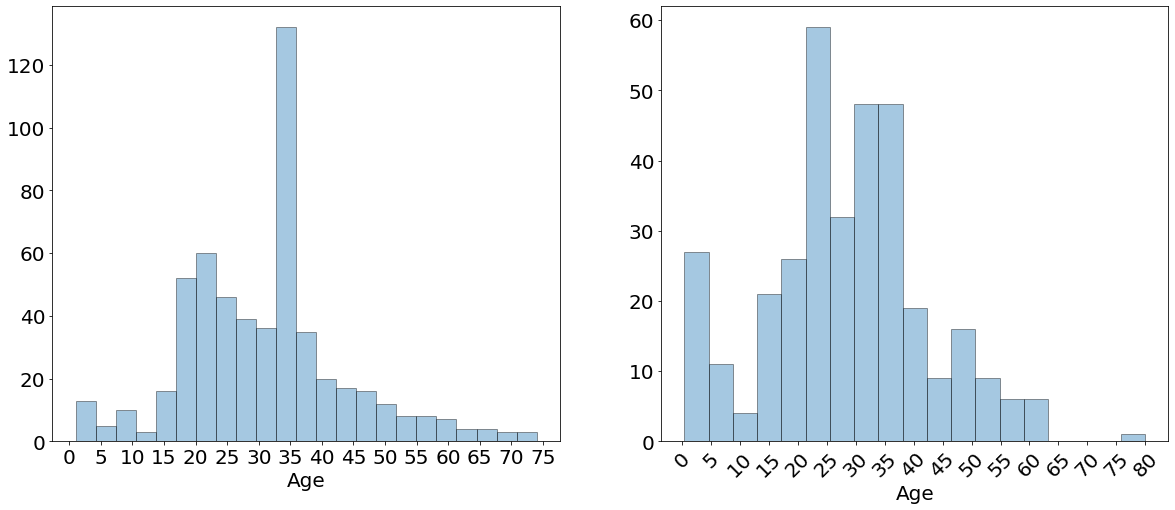

In [27]:
plt.rcParams["patch.force_edgecolor"] = True
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.xticks(rotation="45")
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
sns.distplot(train[train.Survived==0].Age,kde=False,ax=ax[0])
ax[1].set_xticks(x1)
sns.distplot(train[train.Survived==1].Age,kde=False,ax=ax[1])

# Pclass

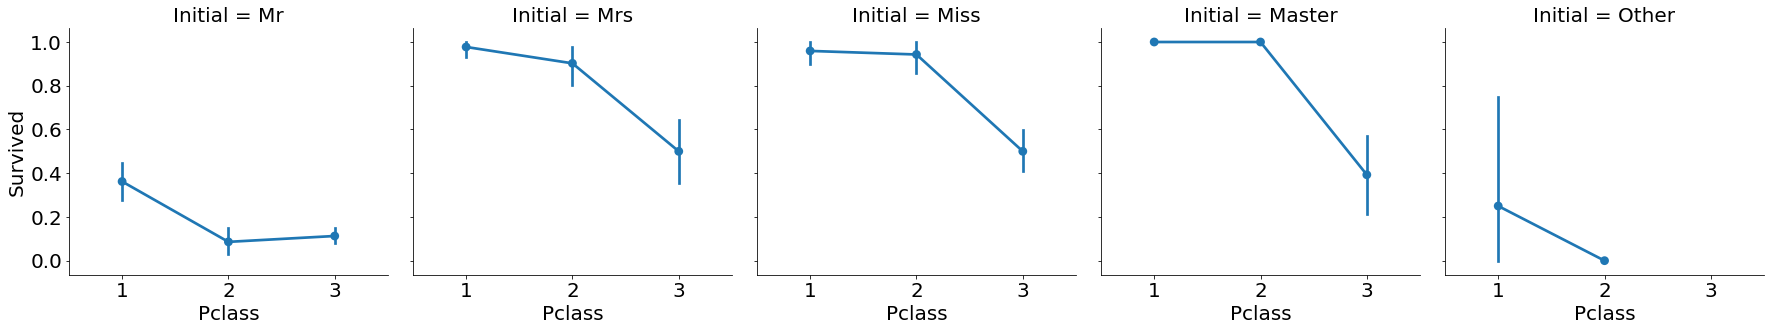

In [28]:
sns.factorplot(x="Pclass",y="Survived",col="Initial",data=train)

# Embarked

In [29]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived])

Sex             female     male    
Survived             0   1    0   1
Embarked Pclass                    
C        1           1  42   25  17
         2           0   7    8   2
         3           8  15   33  10
Q        1           0   1    1   0
         2           0   2    1   0
         3           9  24   36   3
S        1           2  46   51  28
         2           6  61   82  15
         3          55  33  231  34

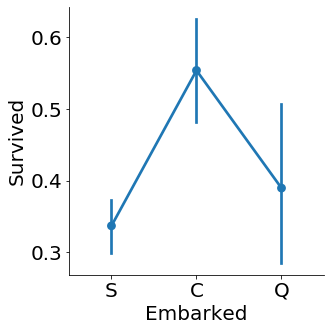

In [30]:
embarked_notnull=train[train.Embarked.notnull()]
sns.factorplot(x="Embarked", y="Survived",data=embarked_notnull)

In [31]:
all_data.Embarked.fillna("S",inplace=True)
train.Embarked.fillna("S",inplace=True)

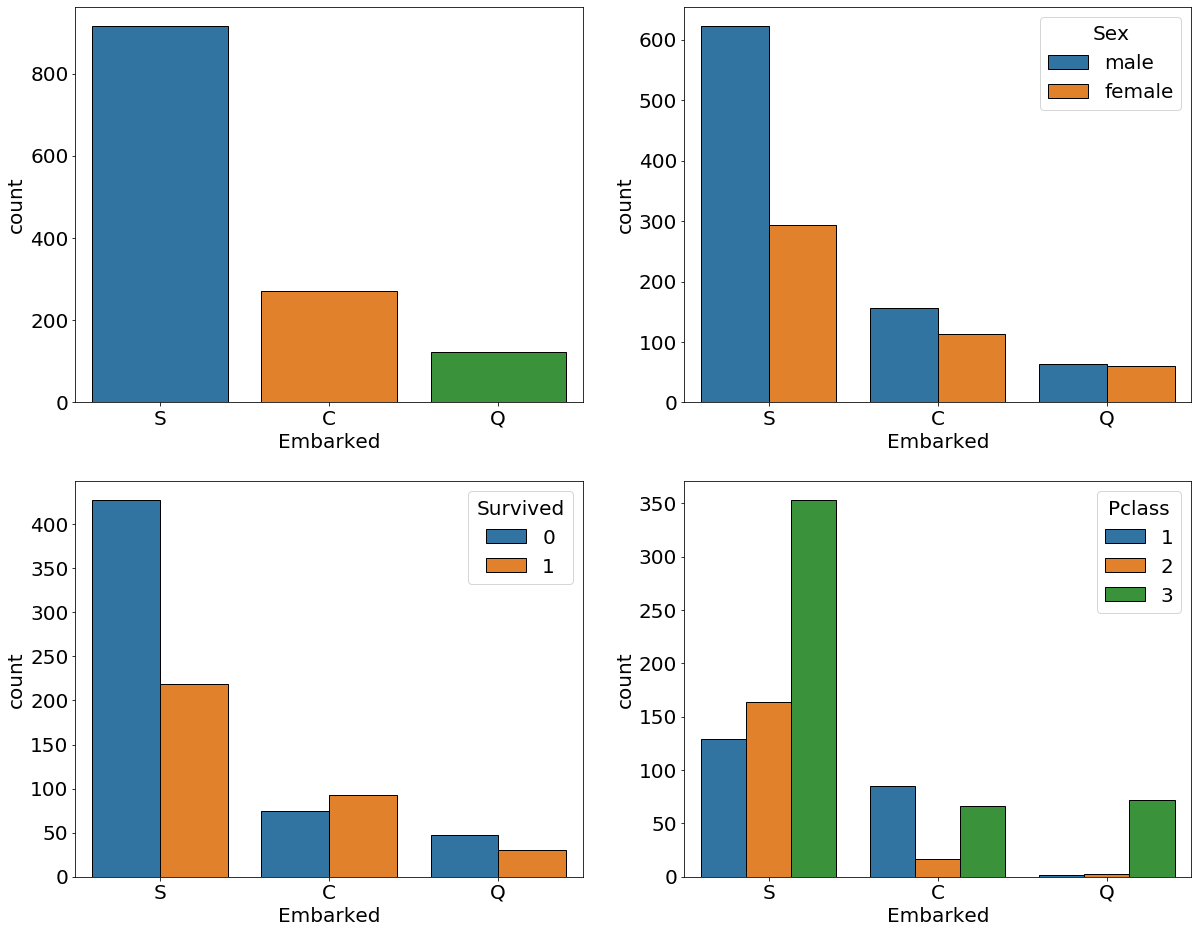

In [32]:
f,ax=plt.subplots(2,2,figsize=(20,16))
sns.countplot(x=all_data.Embarked,ax=ax[0,0])
sns.countplot(x=all_data.Embarked,hue=all_data.Sex,ax=ax[0,1])
sns.countplot(x=train.Embarked,hue=train.Survived,ax=ax[1,0])
sns.countplot(x=train.Embarked,hue=train.Pclass,ax=ax[1,1])

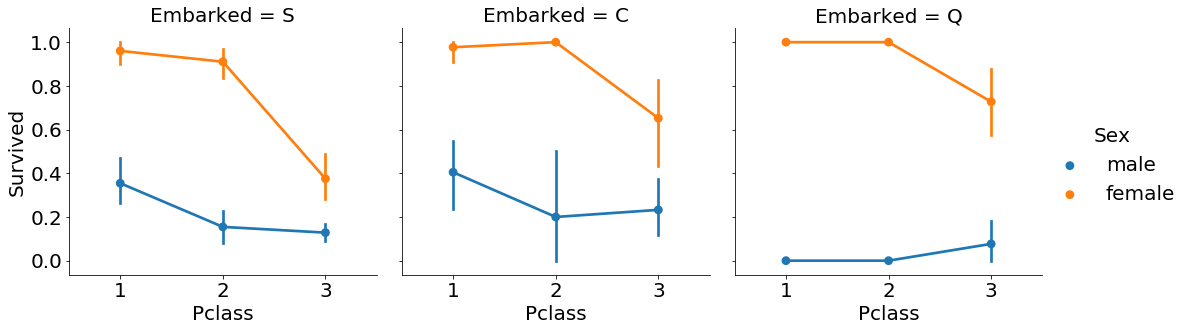

In [33]:
sns.factorplot(x="Pclass", y="Survived",col="Embarked",hue= "Sex", data=train)

# SibSp

In [34]:
pd.crosstab(train.SibSp,train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


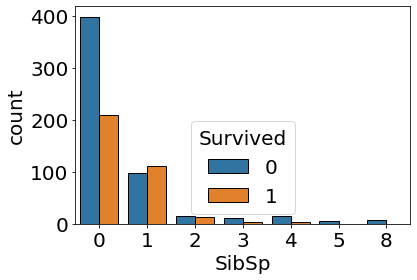

In [35]:
sns.countplot(train.SibSp,hue=train.Survived)

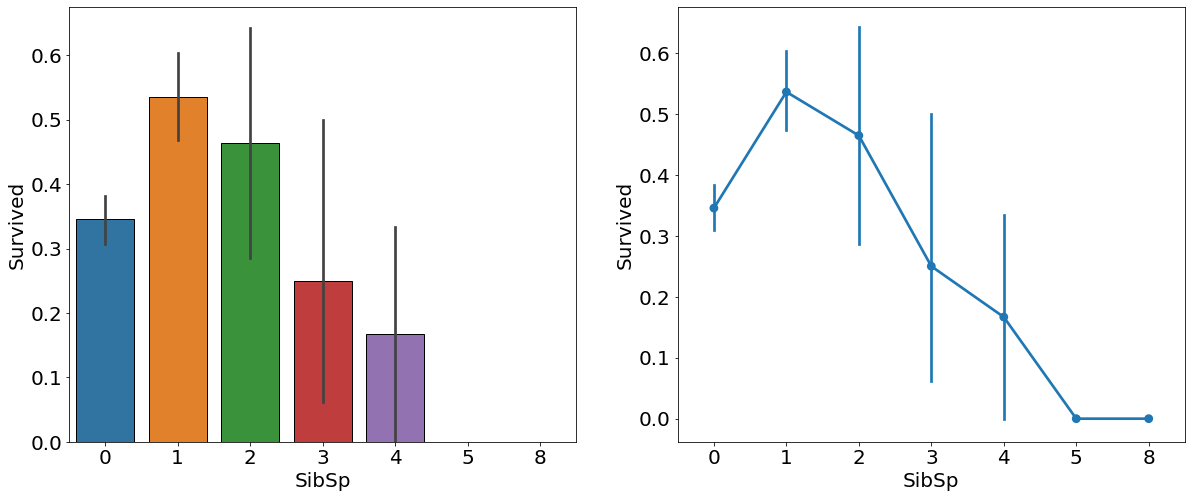

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(train.SibSp,train.Survived,ax=ax[0])
sns.factorplot("SibSp","Survived",data=train,ax=ax[1])
plt.close(2)

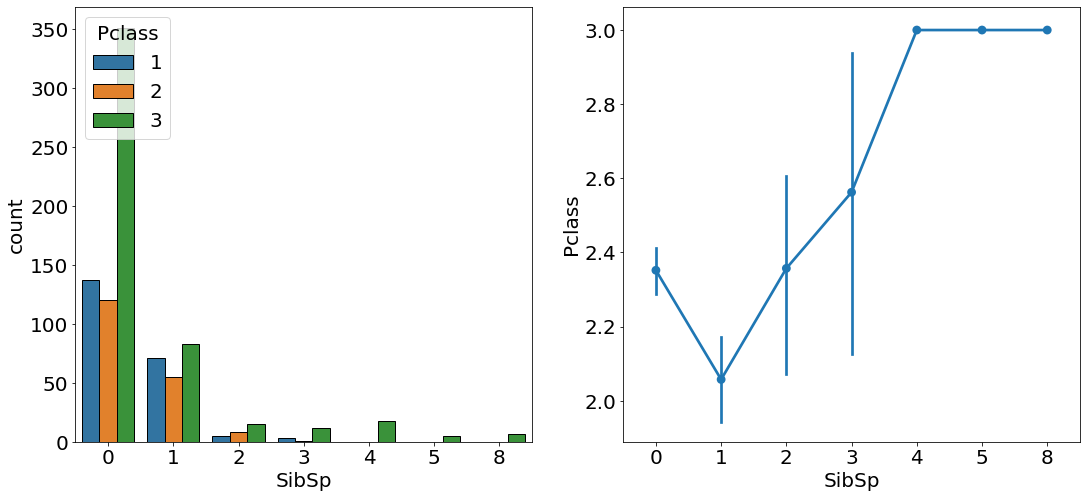

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(train.SibSp,hue=train.Pclass,ax=ax[0])
sns.factorplot("SibSp","Pclass",data=train,ax=ax[1])
plt.close(2)

# Parch

In [38]:
pd.crosstab(train.Parch,train.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


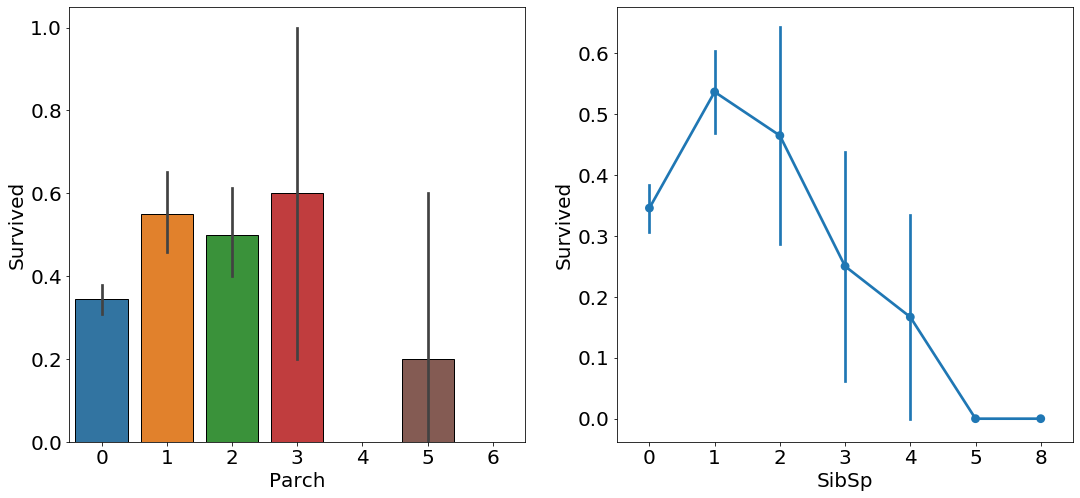

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.barplot("Parch","Survived",data=train,ax=ax[0])
sns.factorplot("SibSp","Survived",data=train,ax=ax[1])
plt.close(2)

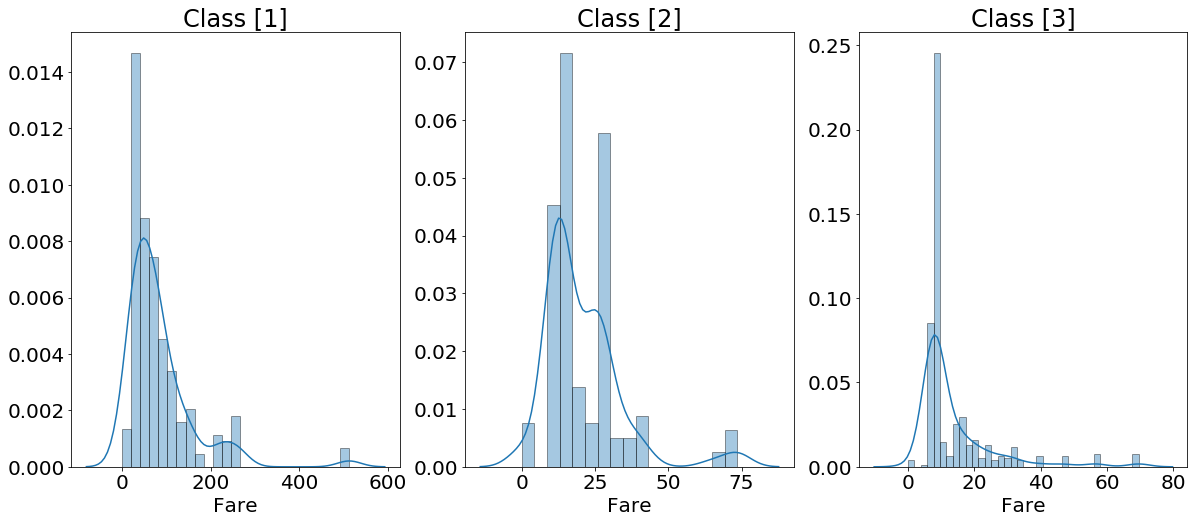

In [40]:
f,ax=plt.subplots(1,3,figsize=(20,8))
ax[0].set_title("Class [1]")
sns.distplot(train[train.Pclass==1].Fare,ax=ax[0])
ax[1].set_title("Class [2]")
sns.distplot(train[train.Pclass==2].Fare,ax=ax[1])
ax[2].set_title("Class [3]")
sns.distplot(train[train.Pclass==3].Fare,ax=ax[2])

In [41]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

# Correlation Between the features

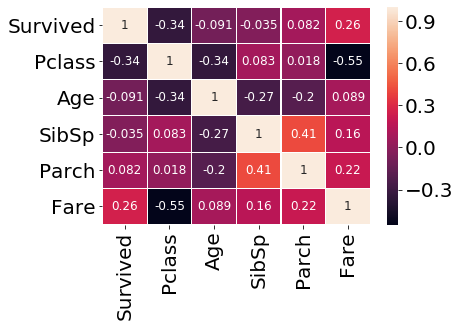

In [42]:
sns.heatmap(train.corr(),annot=True,linewidths=0.1,annot_kws={"size":12})

In [43]:
all_data["Age_band"]=0
all_data.loc[(all_data.Age<16) & (all_data.Age>=0),"Age_band"]=0
all_data.loc[(all_data.Age<32) & (all_data.Age>=16),"Age_band"]=1
all_data.loc[(all_data.Age<48) & (all_data.Age>=32),"Age_band"]=2
all_data.loc[(all_data.Age<64) & (all_data.Age>=48),"Age_band"]=3
all_data.loc[(all_data.Age<80) & (all_data.Age>=64),"Age_band"]=4
all_data.loc[(all_data.Age<16) & (all_data.Age>=80),"Age_band"]=5
all_data.loc[(all_data.Age>=96),"Age_band"]=6


In [44]:
train["Age_band"]=0
train.loc[(train.Age<16) & (train.Age>=0),"Age_band"]=0
train.loc[(train.Age<32) & (train.Age>=16),"Age_band"]=1
train.loc[(train.Age<48) & (train.Age>=32),"Age_band"]=2
train.loc[(train.Age<64) & (train.Age>=48),"Age_band"]=3
train.loc[(train.Age<80) & (train.Age>=64),"Age_band"]=4
train.loc[(train.Age<16) & (train.Age>=80),"Age_band"]=5
train.loc[(train.Age>=96),"Age_band"]=6

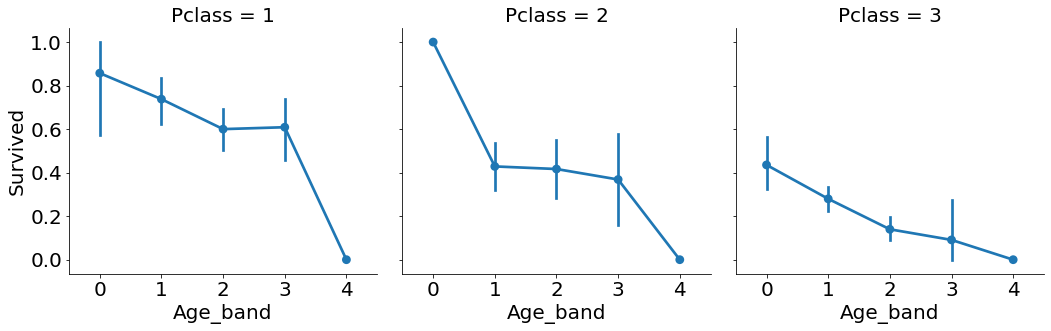

In [45]:
sns.factorplot(x="Age_band",y="Survived",col="Pclass",data=train)

# FamilySize

In [46]:
all_data["FamilySize"]=all_data.Parch+all_data.SibSp
all_data["Alone"]=(all_data.FamilySize==0) 
all_data["Alone"]=all_data.Alone.astype(int)

train["FamilySize"]=all_data[:ntrain].FamilySize
train["Alone"]=all_data[:ntrain].Alone

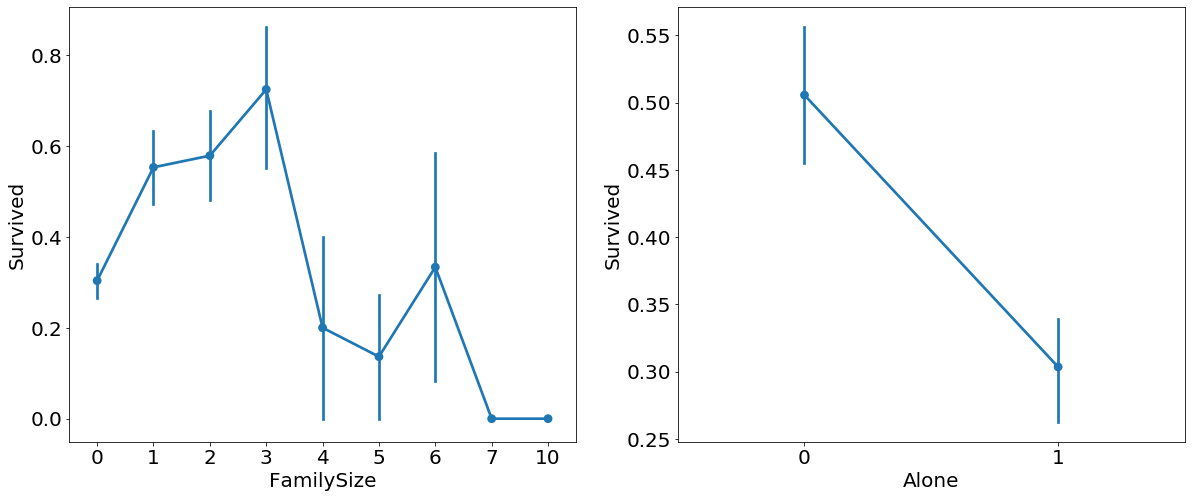

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.factorplot("FamilySize", "Survived",ax=ax[0], data=train)
sns.factorplot("Alone", "Survived",ax=ax[1],data=train)
plt.close(2)
plt.close(3)

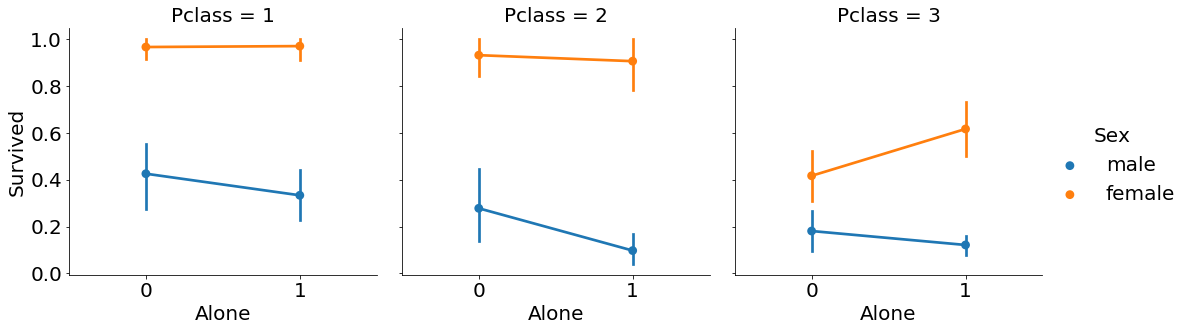

In [48]:
sns.factorplot("Alone","Survived",data=train,hue="Sex",col="Pclass")

# Fare Range

In [49]:
all_data["Fare_Range"]=pd.qcut(all_data.Fare,4)
train["Fare_Range"]=pd.qcut(all_data.Fare,4)
train.groupby("Fare_Range").Survived.mean()

Fare_Range
(-0.001, 7.896]      0.197309
(7.896, 14.454]      0.303571
(14.454, 31.275]     0.441048
(31.275, 512.329]    0.600000
Name: Survived, dtype: float64

In [50]:
all_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Initial', 'Age_band', 'FamilySize', 'Alone',
       'Fare_Range'],
      dtype='object')

In [51]:
remove_cols=['Age', 'Cabin', 'Fare', 'Name', 'Ticket']
all_data.drop(remove_cols,axis=1, inplace=True)

In [52]:
all_data.columns
all_data.shape

(1309, 10)

In [53]:
numerical_cols=[col for col in all_data.columns if all_data[col].dtype not in ["O"]]

In [54]:
numerical_cols

['Parch', 'Pclass', 'SibSp', 'Age_band', 'FamilySize', 'Alone', 'Fare_Range']

In [55]:
for col in numerical_cols:
    all_data[col]=all_data[col].astype(str)

In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Embarked      1309 non-null object
Parch         1309 non-null object
Pclass        1309 non-null object
Sex           1309 non-null object
SibSp         1309 non-null object
Initial       1309 non-null object
Age_band      1309 non-null object
FamilySize    1309 non-null object
Alone         1309 non-null object
Fare_Range    1309 non-null object
dtypes: object(10)
memory usage: 102.4+ KB


In [59]:
all_data=pd.get_dummies(all_data)

# Model

In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [64]:
train=all_data[:ntrain]
test=all_data[ntrain:]


In [ ]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")